<a href="https://colab.research.google.com/github/bnsreenu/python_for_image_processing_APEER/blob/master/93_DL_terminology_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://youtu.be/7x6Clxm7iP4

**Explore various scalers and normalizers for machine learning**

Do not forget to sign up for your free APEER account to use pre-built machine learning tools for semantic and instance segmentation
www.apeer.com

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/wisconsin_breast_cancer_dataset.csv")
print(df.head())

         ID Diagnosis  ...  symmetry_worst  fractal_dimension_worst
0    842302         M  ...          0.4601                  0.11890
1    842517         M  ...          0.2750                  0.08902
2  84300903         M  ...          0.3613                  0.08758
3  84348301         M  ...          0.6638                  0.17300
4  84358402         M  ...          0.2364                  0.07678

[5 rows x 32 columns]


In [ ]:
print(df.columns)

Index(['ID', 'Diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave.points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se ', 'concavity_se ', 'concave.points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave.points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


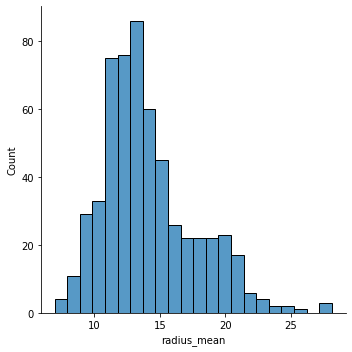

In [ ]:
sns.displot(x = 'radius_mean', data = df)

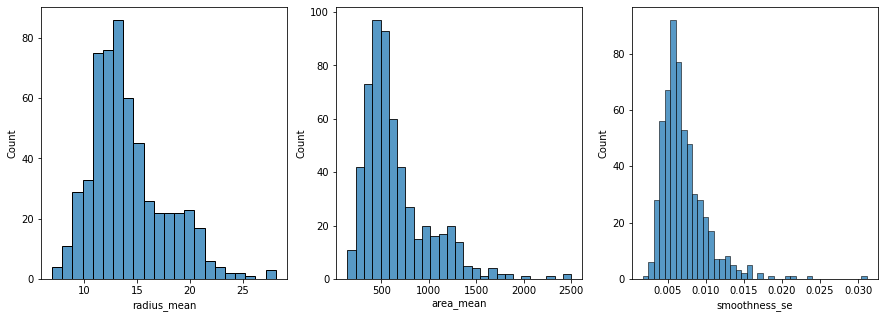

In [ ]:
fig, ax =plt.subplots(1,3, figsize=(15, 5))
sns.histplot(df['radius_mean'], ax=ax[0])
sns.histplot(df['area_mean'], ax=ax[1])
sns.histplot(df['smoothness_se'], ax=ax[2])

fig.show()

In [ ]:
print(df.describe().T)

                         count          mean  ...           75%           max
ID                       569.0  3.037183e+07  ...  8.813129e+06  9.113205e+08
radius_mean              569.0  1.412729e+01  ...  1.578000e+01  2.811000e+01
texture_mean             569.0  1.928965e+01  ...  2.180000e+01  3.928000e+01
perimeter_mean           569.0  9.196903e+01  ...  1.041000e+02  1.885000e+02
area_mean                569.0  6.548891e+02  ...  7.827000e+02  2.501000e+03
smoothness_mean          569.0  9.636028e-02  ...  1.053000e-01  1.634000e-01
compactness_mean         569.0  1.043410e-01  ...  1.304000e-01  3.454000e-01
concavity_mean           569.0  8.879932e-02  ...  1.307000e-01  4.268000e-01
concave.points_mean      569.0  4.891915e-02  ...  7.400000e-02  2.012000e-01
symmetry_mean            569.0  1.811619e-01  ...  1.957000e-01  3.040000e-01
fractal_dimension_mean   569.0  6.279761e-02  ...  6.612000e-02  9.744000e-02
radius_se                569.0  4.051721e-01  ...  4.789000e-01 

In [ ]:
X = df.drop(labels = ["Diagnosis", "ID"], axis=1) 

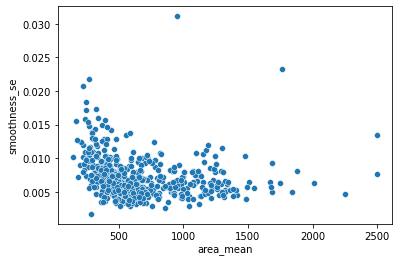

In [ ]:
sns.scatterplot(data=X, x="area_mean", y="smoothness_se")

**Some common scalers and normalizers from scikit-learn**

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler   #Most common
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler  #Most common
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer


**MinMaxScaler**

Most commonly used for scaling structured data in machine learning.

Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

The transformation is given by:

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = X_std * (max - min) + min

where min, max = feature_range.

This transformation is often used as an alternative to zero mean, unit variance scaling.

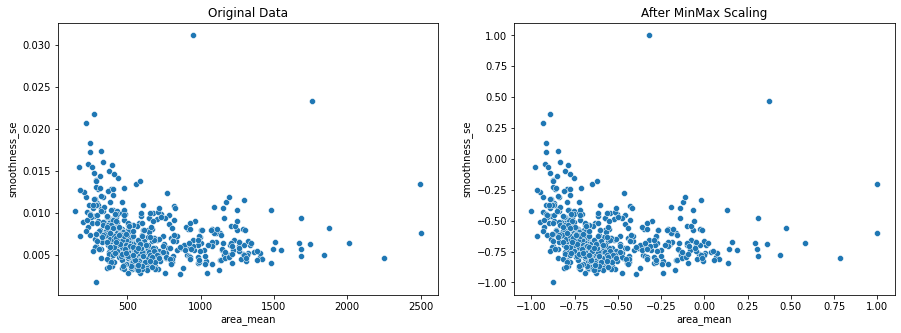

In [ ]:
min_max_scaler = MinMaxScaler((-1,1)) #Default scaling range is 0,1. Can be changed: MinMaxScaler((-1,1))
min_max_scaled_X = pd.DataFrame(min_max_scaler.fit_transform(X.values), columns=X.columns, index=X.index)

fig, ax =plt.subplots(1,2, figsize=(15, 5))
ax[0].set_title('Original Data')
sns.scatterplot(data=X, x="area_mean", y="smoothness_se", ax=ax[0])
ax[1].set_title('After MinMax Scaling')
sns.scatterplot(data=min_max_scaled_X, x="area_mean", y="smoothness_se", ax=ax[1])


**StandardScaler**

Standardize features by removing the mean and scaling to unit variance.
(Standardization usually refers to centering data around zero mean)

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

For instance many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

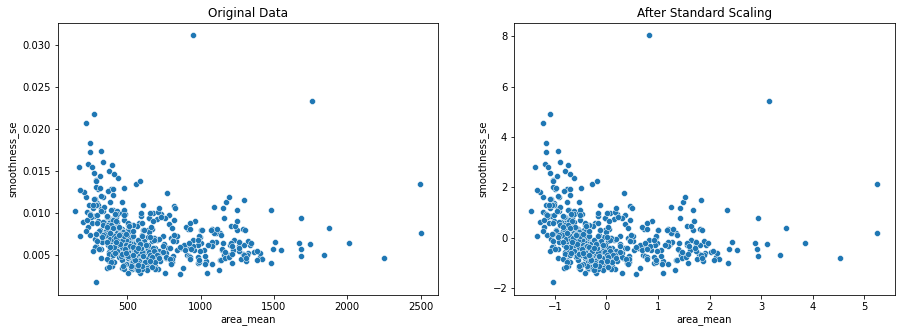

In [ ]:
standard_scaler = StandardScaler()
standard_scaled_X = pd.DataFrame(standard_scaler.fit_transform(X.values), columns=X.columns, index=X.index)

fig, ax =plt.subplots(1,2, figsize=(15, 5))
ax[0].set_title('Original Data')
sns.scatterplot(data=X, x="area_mean", y="smoothness_se", ax=ax[0])
ax[1].set_title('After Standard Scaling')
sns.scatterplot(data=standard_scaled_X, x="area_mean", y="smoothness_se", ax=ax[1])

**MaxAbsScaler**

Scale each feature by its maximum absolute value.

This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0. It does not shift/center the data, and thus does not destroy any sparsity.

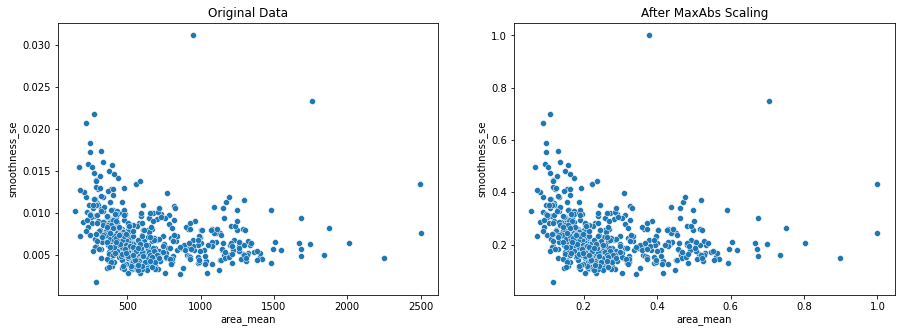

In [ ]:
Max_Abs_scaler = MaxAbsScaler()
Max_Abs_scaled_X = pd.DataFrame(Max_Abs_scaler.fit_transform(X.values), columns=X.columns, index=X.index)

fig, ax =plt.subplots(1,2, figsize=(15, 5))
ax[0].set_title('Original Data')
sns.scatterplot(data=X, x="area_mean", y="smoothness_se", ax=ax[0])
ax[1].set_title('After MaxAbs Scaling')
sns.scatterplot(data=Max_Abs_scaled_X, x="area_mean", y="smoothness_se", ax=ax[1])

**Normalizer**

Normalize samples individually to unit norm.

Each sample (i.e. each row of the data matrix) with at least one non zero component is rescaled independently of other samples so that its norm (l1, l2 or inf) equals one.

Scaling inputs to unit norms is a common operation for text classification or clustering for instance. For instance the dot product of two l2-normalized TF-IDF vectors is the cosine similarity of the vectors and is the base similarity metric for the Vector Space Model commonly used by the Information Retrieval community.

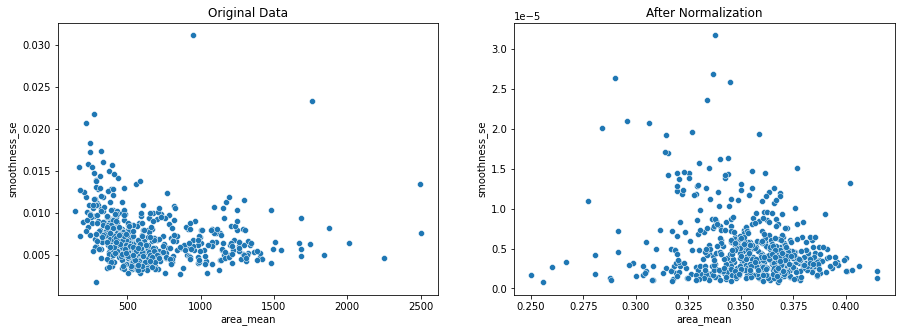

In [ ]:
Normalized = Normalizer(norm='l1')  #Norm = l1 or l2 or max
Normalized_X = pd.DataFrame(Normalized.fit_transform(X.values), columns=X.columns, index=X.index)

fig, ax =plt.subplots(1,2, figsize=(15, 5))
ax[0].set_title('Original Data')
sns.scatterplot(data=X, x="area_mean", y="smoothness_se", ax=ax[0])
ax[1].set_title('After Normalization')
sns.scatterplot(data=Normalized_X, x="area_mean", y="smoothness_se", ax=ax[1])

**QuantileTransformer**

Transform features using quantiles information.

This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

The transformation is applied on each feature independently. First an estimate of the cumulative distribution function of a feature is used to map the original values to a uniform distribution. The obtained values are then mapped to the desired output distribution using the associated quantile function. Features values of new/unseen data that fall below or above the fitted range will be mapped to the bounds of the output distribution. Note that this transform is non-linear. It may distort linear correlations between variables measured at the same scale but renders variables measured at different scales more directly comparable.

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (569). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


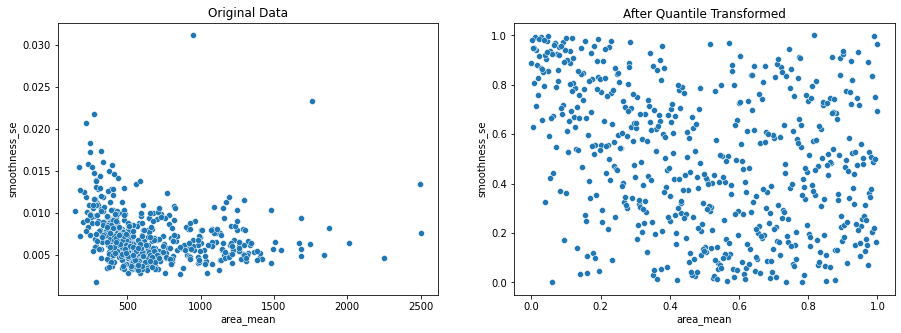

In [ ]:
Quantile_transformed = QuantileTransformer()
Quantile_transformed_X = pd.DataFrame(Quantile_transformed.fit_transform(X.values), columns=X.columns, index=X.index)

fig, ax =plt.subplots(1,2, figsize=(15, 5))
ax[0].set_title('Original Data')
sns.scatterplot(data=X, x="area_mean", y="smoothness_se", ax=ax[0])
ax[1].set_title('After Quantile Transformed')
sns.scatterplot(data=Quantile_transformed_X, x="area_mean", y="smoothness_se", ax=ax[1])

**Summary of all scalers and Normalizers**

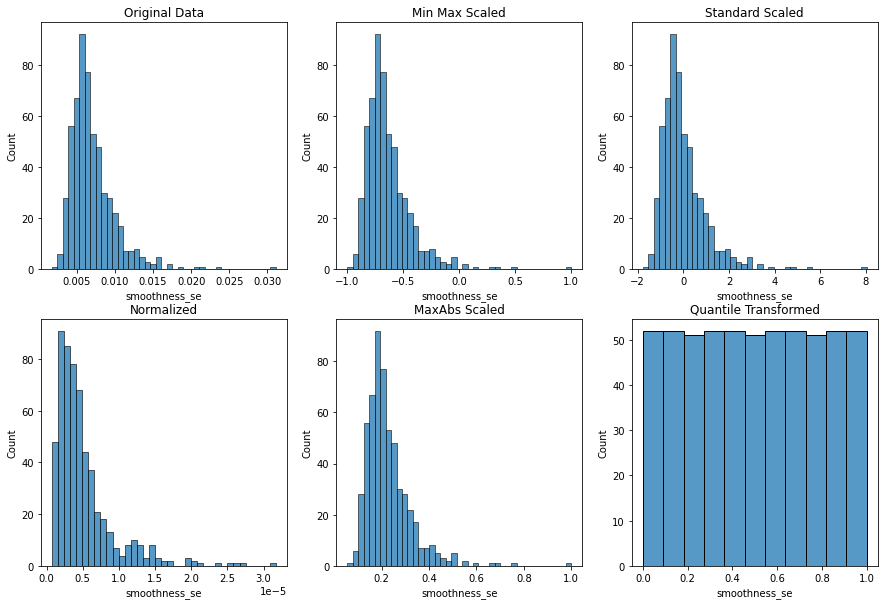

In [ ]:
fig, ax =plt.subplots(2,3, figsize=(15, 10))
ax[0,0].set_title('Original Data')
sns.histplot(X['smoothness_se'], ax=ax[0,0])

ax[0,1].set_title('Min Max Scaled')
sns.histplot(min_max_scaled_X['smoothness_se'], ax=ax[0,1])

ax[0,2].set_title('Standard Scaled')
sns.histplot(standard_scaled_X['smoothness_se'], ax=ax[0,2])

ax[1,0].set_title('Normalized')
sns.histplot(Normalized_X['smoothness_se'], ax=ax[1,0])

ax[1,1].set_title('MaxAbs Scaled')
sns.histplot(Max_Abs_scaled_X['smoothness_se'], ax=ax[1,1])


ax[1,2].set_title('Quantile Transformed')
sns.histplot(Quantile_transformed_X['smoothness_se'], ax=ax[1,2])

fig.show()